# Working with complicated dataset

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [ ]:
import pandas as pd
import seaborn as sn 

columns= ["query acc.ver", "subject acc.ver", "% identity", "alignment length", "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end", "evalue", "bit score", "% positives", "bonds", "publications"]
blast = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv", comment = '#', names = columns, usecols = columns, na_values= '-', thousands = ',', skiprows = 6)
blast = blast.drop(columns = ['query acc.ver'])
new_blast = blast.set_index('subject acc.ver')
new_blast.head(5)

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0


### Question 2
What is the average number of publications?

In [ ]:
### Your code here . . .
import re
#publications = new_blast["publications"].dropna().unique()
#non_num = [i for i in publications if not re.match("[.0-9]+", i)]
#print(non_num)
new_blast['publications'].mean()

26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [ ]:
### Your code here . . .
over_15000 = blast.loc[blast['bonds'] > 15000]['subject acc.ver'].tolist()
print(over_15000)

['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1', '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1', 'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1', 'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1', 'ADD46492.1', 'YP_007025968.1', 'YP_009453806.1', 'YP_007024956.1', 'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1', 'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1', 'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1', 'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1']


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

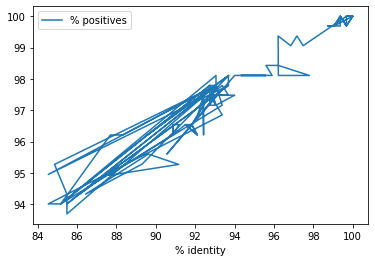

In [ ]:
### Your code here . . .
#Use seaborn lmplot
blast.plot(x='% identity',y='% positives')

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [ ]:
### Your code here . . .
new_columns = ['Unnamed: 0', 'Protein', 'Protein Source']
protein_source = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv"
protein = pd.read_csv(protein_source, names= new_columns)
new_blast = new_blast.reset_index()
merged = new_blast.merge(protein, left_on="subject acc.ver", right_on="Protein", how = "left")
merged = merged.set_index('subject acc.ver')
merged.drop(columns=['Protein', 'Unnamed: 0',])

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein Source
subject acc.ver,,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,RefSeq
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,NaN
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,GenPept
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,NaN
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABX45285.1,92.767,318,23,0,1,318,1,318,0,551,97.48,17348,6.0,NaN
ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19.0,NaN
YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37.0,GenPept
